# ANZ Virtula Intrenship 
## Data @ ANZ

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point,Polygon
import descartes

In [2]:
#!pip install descartes

In [3]:
data=pd.read_excel('ANZ synthesised transaction dataset.xlsx')

In [4]:
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [5]:
data.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [6]:
data.describe(include='all')

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
count,12043,7717.000000,885.0,12043,12043,12043,12043,7717,883.0,12043,...,12043.000000,7717,7717,12043,12043.000000,12043,12043,12043,7717,12043
unique,2,NaN,3.0,100,1,100,6,5725,NaN,80,...,NaN,1609,8,9442,NaN,12043,1,100,2703,2
top,authorized,NaN,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,106e1272-44ab-4dcb-a438-dd98e0071e51,NaN,Michael,...,NaN,Melbourne,NSW,2018-09-03T11:00:00.000+0000,NaN,62493a3ccf694495b9688201d0df776e,Australia,CUS-2487424745,151.21 -33.87,debit
freq,7717,NaN,883.0,578,12043,578,3934,14,NaN,746,...,NaN,255,2169,10,NaN,1,12043,578,145,11160
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.802644,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,30.582330,NaN,NaN,NaN,187.933588,NaN,NaN,NaN,NaN,NaN
std,NaN,0.398029,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,10.046343,NaN,NaN,NaN,592.599934,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,18.000000,NaN,NaN,NaN,0.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,22.000000,NaN,NaN,NaN,16.000000,NaN,NaN,NaN,NaN,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
status               12043 non-null object
card_present_flag    7717 non-null float64
bpay_biller_code     885 non-null object
account              12043 non-null object
currency             12043 non-null object
long_lat             12043 non-null object
txn_description      12043 non-null object
merchant_id          7717 non-null object
merchant_code        883 non-null float64
first_name           12043 non-null object
balance              12043 non-null float64
date                 12043 non-null datetime64[ns]
gender               12043 non-null object
age                  12043 non-null int64
merchant_suburb      7717 non-null object
merchant_state       7717 non-null object
extraction           12043 non-null object
amount               12043 non-null float64
transaction_id       12043 non-null object
country              12043 non-null object
customer_id          12043 n

In [8]:
data.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [9]:
Total=data.customer_id.nunique()
male_acc=data[data['gender']=='M'].customer_id.nunique()
female_acc=Total-male_acc

In [10]:
print('NO of customer is :',Total)
print('No. of Male account holders :',male_acc)
print('No. of female account holders :',female_acc)

NO of customer is : 100
No. of Male account holders : 56
No. of female account holders : 44


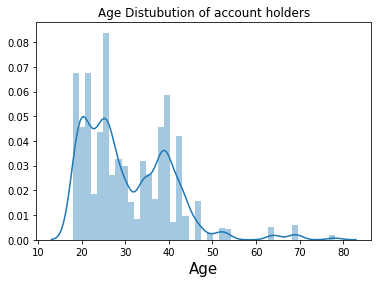

In [11]:
sns.distplot(data.age)
plt.xlabel('Age',fontsize=15)
plt.title('Age Distubution of account holders')
plt.show()

In [12]:
data.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

## Data Cleansing

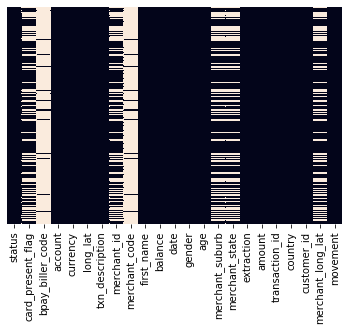

In [13]:
plt.style.use('seaborn-deep')
sns.heatmap(data.isnull(),cbar=False,yticklabels=False)

 ### Removing coloumns which has less than 35% data

In [14]:
bank_ANZ = data[[column for column in data if data[column].count()/len(data) > 0.30]]

#Knowing which columns have be excluded 
print("List of excluded columns: ")
for c in data.columns:
    if c not in bank_ANZ.columns:
        print(c)

List of excluded columns: 
bpay_biller_code
merchant_code


In [15]:
# Droping other coloums which Doesn't reflect much of data
bank_ANZ = bank_ANZ.drop(['currency','country'],axis=1)


In [16]:
bank_ANZ = bank_ANZ.fillna(value='N.A')

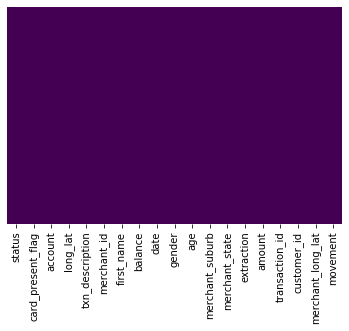

In [17]:
sns.heatmap(bank_ANZ.isnull(),cbar=False,cmap="viridis",yticklabels=False)

In [18]:
bank_ANZ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 19 columns):
status               12043 non-null object
card_present_flag    12043 non-null object
account              12043 non-null object
long_lat             12043 non-null object
txn_description      12043 non-null object
merchant_id          12043 non-null object
first_name           12043 non-null object
balance              12043 non-null float64
date                 12043 non-null datetime64[ns]
gender               12043 non-null object
age                  12043 non-null int64
merchant_suburb      12043 non-null object
merchant_state       12043 non-null object
extraction           12043 non-null object
amount               12043 non-null float64
transaction_id       12043 non-null object
customer_id          12043 non-null object
merchant_long_lat    12043 non-null object
movement             12043 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(15)
memor

In [47]:
bank_ANZ["date"] = pd.to_datetime(bank_ANZ.date)

bank_ANZ["Month"] = bank_ANZ.date.dt.month_name()

bank_ANZ["Weekday"] = bank_ANZ.date.dt.day_name()
bank_ANZ.to_csv('cleansed_data_from_Task1.csv')

# Outliner Dectection

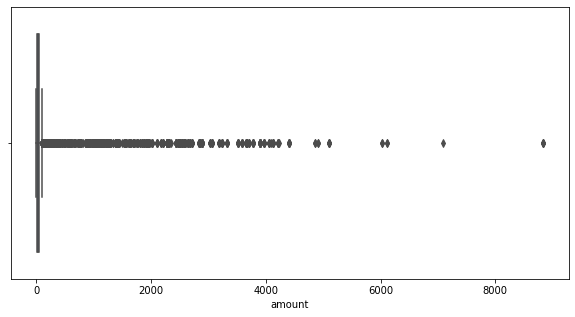

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(bank_ANZ.amount,orient='h')
plt.show()

In [21]:
#Using Z-sore mrthod
outliers=[]
def detect_outliers(data):
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

print(detect_outliers(bank_ANZ.amount))

[3903.95, 3903.73, 2647.38, 3071.14, 2218.73, 3195.01, 2023.68, 3785.78, 2840.15, 2282.36, 3328.77, 2544.76, 2572.91, 3578.65, 4405.3, 4216.04, 3231.26, 2588.01, 2280.36, 3026.95, 2538.68, 3977.46, 4132.23, 2013.08, 2443.24, 6024.49, 3517.61, 2485.37, 2306.63, 2639.76, 2101.51, 3676.94, 2887.34, 2320.3, 2687.85, 3649.51, 2308.67, 2470.45, 2179.96, 2544.76, 2886.52, 2588.01, 2280.36, 2854.74, 4054.77, 2443.24, 2718.51, 3903.95, 5103.51, 3903.73, 2647.38, 3071.14, 2023.68, 3785.78, 2500.0, 2500.0, 2840.15, 2282.36, 3328.77, 2544.76, 2572.91, 3578.65, 4405.3, 4216.04, 8835.98, 3231.26, 2588.01, 2280.36, 2538.68, 3977.46, 4132.23, 2443.24, 3517.61, 2485.37, 2306.63, 2639.76, 2101.51, 3676.94, 2887.34, 2320.3, 2687.85, 4910.9, 3712.56, 3649.51, 2308.67, 2470.45, 2179.96, 2544.76, 2886.52, 2588.01, 2280.36, 2854.74, 4054.77, 2443.24, 2718.51, 3903.95, 3903.73, 2647.38, 3071.14, 2218.73, 3195.01, 2023.68, 3785.78, 2840.15, 2282.36, 3328.77, 2544.76, 2572.91, 3578.65, 4405.3, 4216.04, 3231.26,

## EDA

## OverView of Transactions

Method of Transactions 
 debit     11160
credit      883
Name: movement, dtype: int64


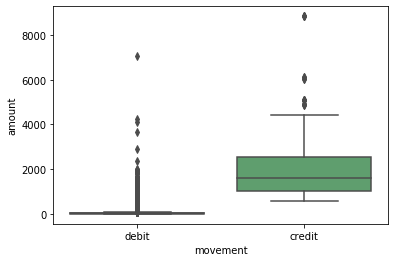

In [22]:
# Count of the methods of transactions

print('Method of Transactions \n',bank_ANZ.movement.value_counts())
sns.boxplot(x="movement",y="amount",data=bank_ANZ)
plt.show()

 ### There isn't much Credit trans, From this we can say large amount of money is credited into the account and this money is spent in small amounts

In [23]:
# Types of Transactoins and overview
print('Diffrent types of Transactions happening:\n')
bank_ANZ.groupby('txn_description').amount.describe()

Diffrent types of Transactions happening:



,count,mean,std,min,25%,50%,75%,max
txn_description,,,,,,,,
INTER BANK,742.0,86.699461,198.706044,16.0,26.000,39.000,83.000,1956.00
PAY/SALARY,883.0,1898.728029,1150.364621,576.0,1013.670,1626.480,2538.680,8835.98
PAYMENT,2600.0,77.613077,152.310315,15.0,32.000,42.500,70.000,1981.00
PHONE BANK,101.0,106.099010,245.999695,21.0,36.000,43.000,67.000,1916.00
POS,3783.0,40.407412,165.771678,0.1,12.035,19.430,33.155,7081.09
SALES-POS,3934.0,39.909789,132.734185,0.1,12.160,20.035,34.575,4233.00


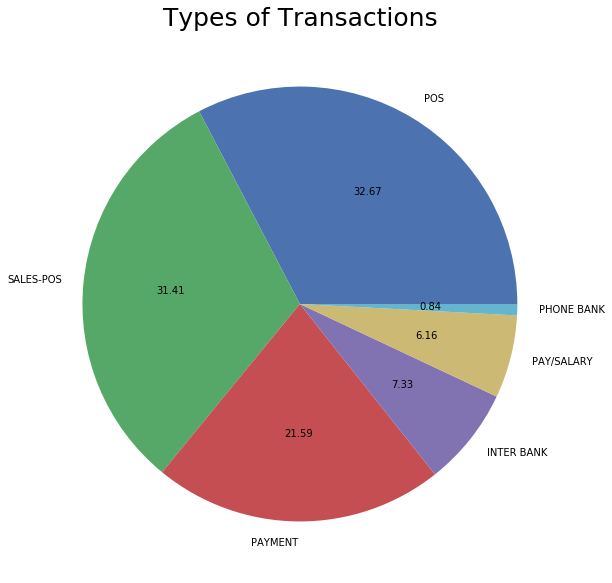

In [24]:


plt.figure(figsize=(10,10))
plt.pie(bank_ANZ.txn_description.value_counts(),labels=bank_ANZ.txn_description.unique(),autopct= '%0.2f')
plt.title('Types of Transactions',fontsize=25)
plt.show()

### We can see that majority of the transaction as taking place through Purchaes/ Shoppings they make upto 65% of the transactions,And there isn't much of Phone Banking, Coustmer Should be more encrouged to use digital means

## Salary Transactions

In [25]:
salary_trans = bank_ANZ[bank_ANZ['txn_description']=='PAY/SALARY']
print('Num of salary trans:',salary_trans.customer_id.count())

Num of salary trans: 883


### No. of Salary Transactions are equal to No. of criedt Transactions.
#### Hence all the money coming in only through Salary , Which isn't much of good sign there should more flow of money in accounts throungh varies methods

In [26]:
#Male and Female Salary 
male_salary=salary_trans[salary_trans['gender']=='M']
female_salary=salary_trans[salary_trans['gender']=='F']


In [27]:
print("Average salary is :",1898.72)
print('Average male salary is:',male_salary.amount.mean())
print('Average female salary is:',female_salary.amount.mean())


Average salary is : 1898.72
Average male salary is: 2096.811681034481
Average female salary is: 1679.3704773269665


### Categorizing the transactions

In [28]:
bank_ANZ.status.value_counts()

authorized    7717
posted        4326
Name: status, dtype: int64

In [29]:
Authorized_Data = bank_ANZ[bank_ANZ["status"] == "authorized"]
Posted_Data = bank_ANZ[bank_ANZ["status"] == "posted"]

In [30]:
Authorized_Data.shape,Posted_Data.shape

((7717, 21), (4326, 21))

### Most transactoions are through  offline purschase/shopping

## Customer and Transactions

In [32]:
cust_long=[]
cust_lat=[]
mer_long=[]
mer_lat=[]


In [33]:
for val in Authorized_Data["long_lat"]:
    cust_long.append(float(val.split()[0]))
    cust_lat.append(float(val.split()[1]))
    
for val in Authorized_Data["merchant_long_lat"]:
    mer_long.append(float(val.split()[0]))
    mer_lat.append(float(val.split()[1]))

In [34]:
Authorized_Data.insert(4,"Cust_long",cust_long,True)
Authorized_Data.insert(5,"Cust_lat",cust_lat,True)
Authorized_Data.insert(6,"Merchant_long",mer_long,True)
Authorized_Data.insert(7,"Merchant_lat",mer_lat,True)

In [35]:
Authorized_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7717 entries, 0 to 12042
Data columns (total 25 columns):
status               7717 non-null object
card_present_flag    7717 non-null object
account              7717 non-null object
long_lat             7717 non-null object
Cust_long            7717 non-null float64
Cust_lat             7717 non-null float64
Merchant_long        7717 non-null float64
Merchant_lat         7717 non-null float64
txn_description      7717 non-null object
merchant_id          7717 non-null object
first_name           7717 non-null object
balance              7717 non-null float64
date                 7717 non-null datetime64[ns]
gender               7717 non-null object
age                  7717 non-null int64
merchant_suburb      7717 non-null object
merchant_state       7717 non-null object
extraction           7717 non-null object
amount               7717 non-null float64
transaction_id       7717 non-null object
customer_id          7717 non-null obje

In [36]:
customer=Authorized_Data[['status','card_present_flag','customer_id','first_name','gender','amount','txn_description','movement','date','Month','Weekday','Cust_long','Cust_lat']]
merchant=bank_ANZ[['merchant_id','txn_description','merchant_suburb','merchant_state','date','amount','gender']]
merchant[['Merchant_long','Merchant_lat']]=Authorized_Data[['Merchant_long','Merchant_lat']]
customer

C:\Users\abhil\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,status,card_present_flag,customer_id,first_name,gender,amount,txn_description,movement,date,Month,Weekday,Cust_long,Cust_lat
0,authorized,1,CUS-2487424745,Diana,F,16.25,POS,debit,2018-08-01,August,Wednesday,153.41,-27.95
1,authorized,0,CUS-2487424745,Diana,F,14.19,SALES-POS,debit,2018-08-01,August,Wednesday,153.41,-27.95
2,authorized,1,CUS-2142601169,Michael,M,6.42,POS,debit,2018-08-01,August,Wednesday,151.23,-33.94
3,authorized,1,CUS-1614226872,Rhonda,F,40.90,SALES-POS,debit,2018-08-01,August,Wednesday,153.10,-27.66
4,authorized,1,CUS-2487424745,Diana,F,3.25,SALES-POS,debit,2018-08-01,August,Wednesday,153.41,-27.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0,CUS-55310383,Melissa,F,9.79,POS,debit,2018-10-31,October,Wednesday,149.83,-29.47
12039,authorized,1,CUS-2688605418,Robert,M,63.87,SALES-POS,debit,2018-10-31,October,Wednesday,151.22,-33.87
12040,authorized,1,CUS-2663907001,Craig,M,43.96,POS,debit,2018-10-31,October,Wednesday,151.12,-33.89
12041,authorized,1,CUS-1388323263,Tyler,M,30.77,SALES-POS,debit,2018-10-31,October,Wednesday,144.96,-37.76


In [37]:
cust_grouped=customer.groupby(['customer_id','first_name'])

In [38]:
trans_count=pd.DataFrame(cust_grouped.movement.count().sort_values(ascending=False))
trans_count.reset_index('first_name',inplace=True)
trans_count.rename(columns={'movement':'Num_trans'},inplace=True)
trans_count

,first_name,Num_trans
customer_id,,
CUS-2487424745,Diana,531
CUS-2142601169,Michael,276
CUS-3026014945,Tonya,248
CUS-1614226872,Rhonda,220
CUS-860700529,Jeffrey,206
...,...,...
CUS-495599312,Jonathan,9
CUS-3151318058,Eric,9
CUS-2500783281,Marissa,4


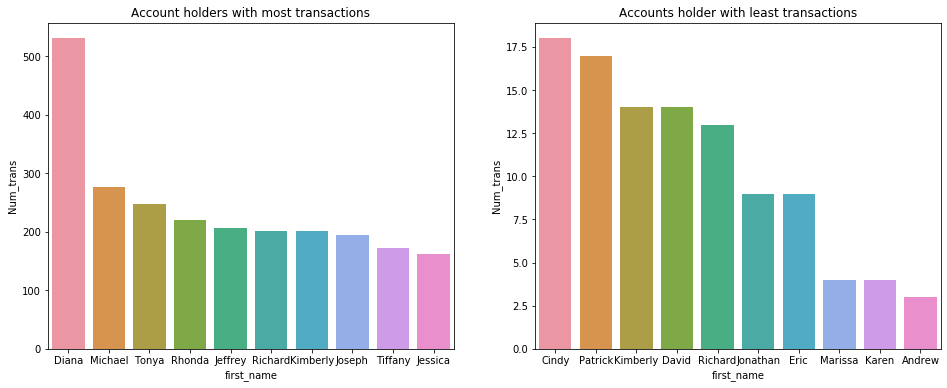

In [39]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(16,6))
sns.barplot(x=trans_count.first_name.head(10),y=trans_count.Num_trans.head(10),ax=ax1)
ax1.set_title('Account holders with most transactions')
sns.barplot(x=trans_count.first_name.tail(10),y=trans_count.Num_trans.tail(10),ax=ax2)
ax2.set_title('Accounts holder with least transactions')
plt.show()

### Daily and Month wise spending

In [40]:
print('Average on Daily Basics Transctions in AUD \n',bank_ANZ.groupby('Weekday').amount.mean().sort_values(ascending=True))
print()
print('Average Monthly Transactions in AUD \n',bank_ANZ.groupby('Month').amount.mean())

Average on Daily Basics Transctions in AUD 
 Weekday
Sunday        53.015845
Saturday      54.419286
Thursday     184.010422
Wednesday    195.215570
Tuesday      221.576456
Friday       249.353517
Monday       373.221000
Name: amount, dtype: float64

Average Monthly Transactions in AUD 
 Month
August       185.121867
October      196.427323
September    182.045903
Name: amount, dtype: float64


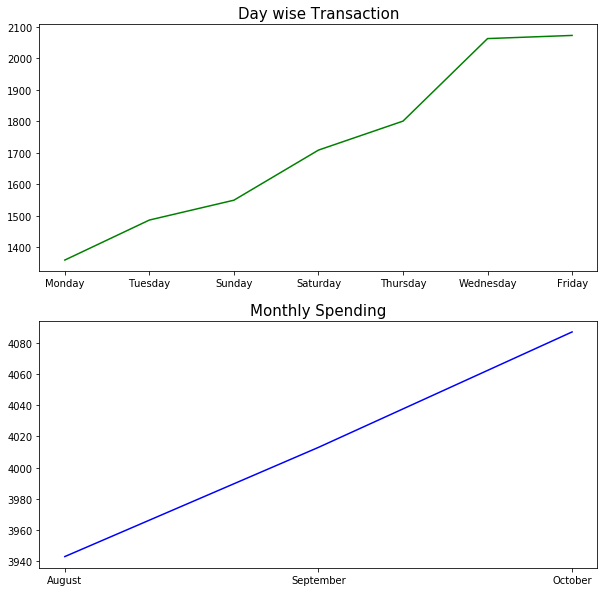

In [41]:
fig,(ax1,ax2)=plt.subplots(nrows=2,ncols=1,figsize=(10,10))

ax1.plot(bank_ANZ.groupby('Weekday').movement.count().sort_values(ascending=True),c='g')
ax1.set_title("Day wise Transaction",fontsize=15)

ax2.plot(bank_ANZ.groupby('Month').movement.count().sort_values(ascending=True),c='b')
ax2.set_title("Monthly Spending",fontsize=15)
plt.show()


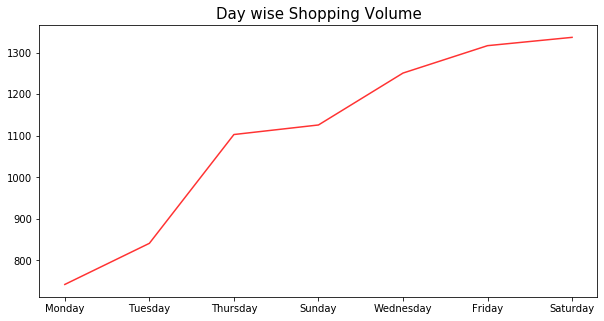

In [42]:
plt.figure(figsize=(10,5))
plt.plot(Authorized_Data.groupby('Weekday').amount.count().sort_values(),alpha=0.8,c='r')
plt.title("Day wise Shopping Volume",fontsize=15)
plt.show()

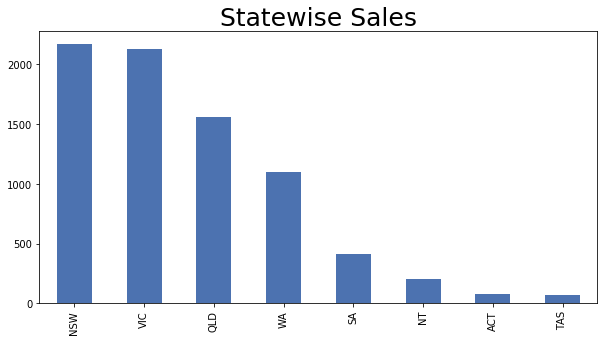

In [43]:
plt.figure(figsize=(10,5))
merchant[merchant["merchant_state"] != "N.A"]["merchant_state"].value_counts().plot(kind="bar")
plt.title('Statewise Sales',fontsize=25)
plt.show()

In [44]:
crs = {'init':"epsg:4326"}

In [45]:
geometry = [Point(xy) for xy in zip(Authorized_Data["Merchant_long"],Authorized_Data["Merchant_lat"])]
geo_df = gpd.GeoDataFrame(Authorized_Data,crs = crs ,geometry=geometry)
Australia = gpd.read_file("E:\AI\Vir_Intrenship\ANZ\AUS\AUS.shp")

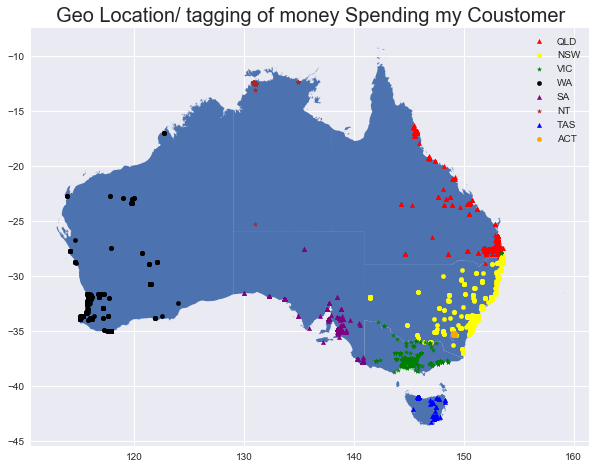

In [46]:
plt.style.use("seaborn")
fig,ax = plt.subplots(figsize = (10,10))
plt.title('Geo Location/ tagging of money Spending my Coustomer',fontsize=20)
Australia.plot(ax=ax)
geo_df[geo_df["merchant_state"] == "QLD"].plot(ax=ax,markersize = 20,color = "red",marker = "^",label="QLD")
geo_df[geo_df["merchant_state"] == "NSW"].plot(ax=ax,markersize = 20,color = "yellow",marker = "o",label="NSW")
geo_df[geo_df["merchant_state"] == "VIC"].plot(ax=ax,markersize = 20,color = "green",marker = "*",label="VIC")
geo_df[geo_df["merchant_state"] == "WA"].plot(ax=ax,markersize = 20,color = "black",marker = "o",label="WA")
geo_df[geo_df["merchant_state"] == "SA"].plot(ax=ax,markersize = 20,color = "purple",marker = "^",label="SA")
geo_df[geo_df["merchant_state"] == "NT"].plot(ax=ax,markersize = 20,color = "brown",marker = "*",label="NT")
geo_df[geo_df["merchant_state"] == "TAS"].plot(ax=ax,markersize = 20,color = "blue",marker = "^",label="TAS")
geo_df[geo_df["merchant_state"] == "ACT"].plot(ax=ax,markersize = 20,color = "orange",marker = "o",label="ACT")
plt.legend()